In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) # x0^2 + x1^2

In [4]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [5]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [6]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return x, vx
    else:
        return x

In [7]:
init_x = np.array([-3.0, 4.0])

In [8]:
grad1 = gradient_descent(function_2, init_x = init_x)

In [9]:
x_final = gradient_descent(function_2, init_x = init_x, lr = 0.11)

In [10]:
x_final

array([-1.16897164e-20,  1.50546871e-20])

In [48]:
x0 = np.arange(-2, 2, 0.1) 
x1 = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x0, x1)
print(X.shape,Y.shape)

nrows = X.shape[0]
ncols = X.shape[1]

(40, 40) (40, 40)


In [49]:
Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf])
arr = arr.transpose()
print(Xf.shape,Yf.shape)
print(arr.shape, arr.ndim)

(1600,) (1600,)
(1600, 2) 2


In [50]:
Z = function_2(arr)
print(Z.shape)

(1600,)


In [51]:
Z = np.reshape(Z, (nrows,ncols))
print(X.shape, Y.shape, Z.shape)

(40, 40) (40, 40) (40, 40)


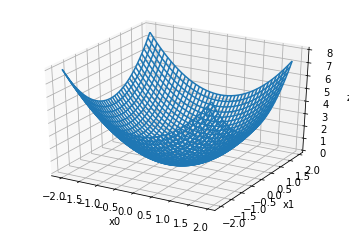

In [52]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')
plt.show()